# Create Op Tutorial

A simple adaptation of using the Jupyter Scala Implementation (https://github.com/alexarchambault/jupyter-scala) of these examples (https://github.com/imagej/imagej-tutorials/tree/master/create-a-new-op)

In [1]:
classpath.addRepository("http://maven.imagej.net/content/groups/public")
classpath.add("net.imagej" % "imagej" % "2.0.0-rc-50") // use % since %% adds scala version
classpath.add("de.christophkraemer" % "rhino-script-engine" % "1.1.0")  // since it's not in the classpath with notebooks per default

22 new artifact(s)

22 new artifacts in macro


22 new artifacts in runtime
22 new artifacts in compile


2 new artifact(s)


2 new artifacts in macro
2 new artifacts in runtime
2 new artifacts in compile


In [2]:
import net.imagej.ops.AbstractOp
import net.imagej.ops.Op
import net.imglib2.Cursor
import net.imglib2.img.array.ArrayImg
import net.imglib2.img.array.ArrayImgs
import net.imglib2.img.basictypeaccess.array.DoubleArray
import net.imglib2.`type`.numeric.RealType
import net.imglib2.`type`.numeric.real.DoubleType
import net.imglib2.img.Img
import org.scijava.ItemIO
import org.scijava.plugin.Parameter
import org.scijava.plugin.Plugin

import net.imagej.ops.AbstractOp
import net.imagej.ops.Op
import net.imglib2.Cursor
import net.imglib2.img.array.ArrayImg
import net.imglib2.img.array.ArrayImgs
import net.imglib2.img.basictypeaccess.array.DoubleArray
import net.imglib2.`type`.numeric.RealType
import net.imglib2.`type`.numeric.real.DoubleType
import net.imglib2.img.Img
import org.scijava.ItemIO
import org.scijava.plugin.Parameter
import org.scijava.plugin.Plugin

In [3]:
import special.wrap.obj // needed so the class is created correctly
import net.imglib2.`type`.numeric.integer.UnsignedByteType
@Plugin(`type` = classOf[Op], name = "ramp")
class Ramp extends AbstractOp {
    
    @Parameter(`type` = ItemIO.OUTPUT)
	private var rampImg: ArrayImg[UnsignedByteType, _] = null
    
	override def run(): Unit = {
        rampImg = ArrayImgs.unsignedBytes(256, 256);

		val c = rampImg.localizingCursor();
		val pos = new Array[Long](rampImg.numDimensions());
		while (c.hasNext()) {
			c.fwd()
			c.localize(pos)
			c.get().setReal(sum(pos))
		}
	}
    
    private def sum(pos: Array[Long]) = {
		var sum = 0.0f;
		for (p <- pos) sum += p;
		sum/2
	}
}

import net.imglib2.`type`.numeric.integer.UnsignedByteType
defined class Ramp

In [4]:
import net.imagej.ImageJ
implicit val ij = new ImageJ() // so it can be pulled into other functions

import net.imagej.ImageJ
ij: net.imagej.ImageJ = net.imagej.ImageJ@644cad7e

In [5]:
// Manually Register the Op as a plugin
import org.scijava.plugin.PluginInfo
val rampInfo = new PluginInfo(classOf[Ramp],
                              classOf[Op]
                             )
ij.plugin().addPlugin(rampInfo)

import org.scijava.plugin.PluginInfo
rampInfo: org.scijava.plugin.PluginInfo[Op] = name='ramp', priority=0.0, enabled=true, pluginType=Op

In [6]:
// call the op to make a new image
val rampImage = ij.op().run("ramp")


rampImage: Object = ArrayImg [256x256]

In [7]:
implicit class previewDataset(curSet: net.imagej.Dataset)(implicit ij: net.imagej.ImageJ) {
    /** saves the file to a temporary directory, read it in again as a bytearray and feed it to the jupyter function **/
    def preview() = {
        val tFile = java.io.File.createTempFile("jupy",".jpg")
        ij.scifio().datasetIO().save(curSet,tFile.getPath())
        val imgFIS = new java.io.FileInputStream(tFile.getPath())
        val out = new Array[Byte](imgFIS.getChannel().size().toInt)
        imgFIS.read(out)
        display.jpg(out)
    }
}

defined class previewDataset

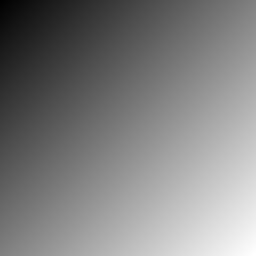

In [8]:
ij.dataset().create(
    rampImage.asInstanceOf[Img[UnsignedByteType]]
).preview()

## Byte Image
Since doubles are hard to save / visualize in web browsers we make a byte version

In [9]:

import net.imglib2.`type`.numeric.RealType
implicit class dsImgPlus[T <: RealType[T], U <: net.imglib2.img.Img[T]](curImg: U)(implicit ij: net.imagej.ImageJ) {
    def toDataset() = {
       ij.dataset().create(net.imagej.ImgPlus.wrap(curImg))
    }
    def preview(): Unit = previewDataset(toDataset())(ij).preview()
}

implicit class previewBufferedImage(bi: java.awt.image.BufferedImage) {
    /** saves the file to a temporary directory, read it in again as a bytearray and feed it to the jupyter function **/
    def preview() = {
        val baos = new java.io.ByteArrayOutputStream()
        javax.imageio.ImageIO.write(bi,"jpg",baos)
        display.jpg(baos.toByteArray)
    }
}

import net.imglib2.`type`.numeric.RealType
defined class dsImgPlus
defined class previewBufferedImage

## Create from Double
A very primitive attempt to calculate the values from the double image

In [10]:
import special.wrap.obj // needed so the class is created correctly
@Plugin(`type` = classOf[Op], name = "dblramp")
class DoubleRamp extends AbstractOp {
    
    @Parameter(`type` = ItemIO.OUTPUT)
	private var rampImg: ArrayImg[DoubleType, DoubleArray] = null
    
	override def run(): Unit = {
        rampImg = ArrayImgs.doubles(256, 256);

		val c = rampImg.localizingCursor();
		val pos = new Array[Long](rampImg.numDimensions());
		while (c.hasNext()) {
			c.fwd()
			c.localize(pos)
			c.get().setReal(sum(pos))
		}
	}
    
    private def sum(pos: Array[Long]) = {
		var sum = 0.0f;
		for (p <- pos) sum += p;
		sum
	}
}

// Manually Register the Op as a plugin
import org.scijava.plugin.PluginInfo
val rampInfo = new PluginInfo(classOf[DoubleRamp],
                              classOf[Op]
                             )
ij.plugin().addPlugin(rampInfo)

defined class DoubleRamp
import org.scijava.plugin.PluginInfo
rampInfo: PluginInfo[Op] = name='dblramp', priority=0.0, enabled=true, pluginType=Op

In [11]:
// call the op to make a new image
val dblRampImage = ij.op().run("dblramp")

dblRampImage: Object = ArrayImg [256x256]

In [13]:
import net.imglib2.RandomAccessibleInterval
val typeRamp = rampImage.asInstanceOf[net.imglib2.img.Img[DoubleType]]
//val dsRamp = new net.imagej.DefaultDataset(ij.getContext(),net.imagej.ImgPlus.wrap(typeRamp))


import net.imglib2.RandomAccessibleInterval
typeRamp: Img[DoubleType] = ArrayImg [256x256]

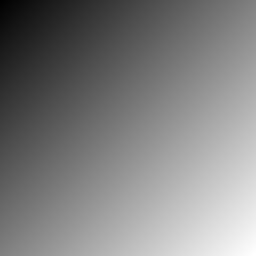

normImg: Img[DoubleType] = ArrayImg [256x256]
res13_1: net.imglib2.IterableInterval[DoubleType] = ArrayImg [256x256]

In [14]:
val normImg = typeRamp.copy()
ij.op().image().normalize(typeRamp,normImg)
ij.dataset().create(normImg).preview()